In [9]:
import pandas as pd
import numpy as np
import os
import glob
import xarray as xr
import matplotlib.pyplot as plt

#read list of events from txt file
eve = np.loadtxt('./../data/events/sample_events1212.txt',dtype = 'str')
sim_dir = './../data/simu/PS_003/'

#read the file in one of the sim event folder
eve_path = os.path.join(sim_dir,eve[109])
file_list = glob.glob(eve_path + '/*.nc')
print(file_list)


['./../data/simu/PS_003/E02020N3739E02658N3366-PS-Str_PYes_Var-M902_E02243N3539_S001/C_SR.nc', './../data/simu/PS_003/E02020N3739E02658N3366-PS-Str_PYes_Var-M902_E02243N3539_S001/C_CT.nc', './../data/simu/PS_003/E02020N3739E02658N3366-PS-Str_PYes_Var-M902_E02243N3539_S001/C_SR_flowdepth.nc', './../data/simu/PS_003/E02020N3739E02658N3366-PS-Str_PYes_Var-M902_E02243N3539_S001/grid0_ts.nc']


In [10]:
for i in range(len(file_list)):
    print(file_list[i])
    ds = xr.open_dataset(file_list[i])
    print(ds)

#read the file in one of the sim event folder

./../data/simu/PS_003/E02020N3739E02658N3366-PS-Str_PYes_Var-M902_E02243N3539_S001/C_SR.nc
<xarray.Dataset>
Dimensions:       (lon: 1300, lat: 948, grid_lon: 1300, grid_lat: 948, time: 2)
Coordinates:
  * lon           (lon) float64 15.2 15.2 15.2 15.2 ... 15.34 15.34 15.34 15.34
  * lat           (lat) float64 37.0 37.0 37.0 37.0 ... 37.08 37.08 37.08 37.08
  * grid_lon      (grid_lon) float64 15.2 15.2 15.2 15.2 ... 15.34 15.34 15.34
  * grid_lat      (grid_lat) float64 37.0 37.0 37.0 37.0 ... 37.08 37.08 37.08
  * time          (time) datetime64[ns] 1970-01-01 1970-01-01T04:00:00.101562500
Data variables:
    deformation   (grid_lat, grid_lon) float32 ...
    max_height    (lat, lon) float32 ...
    max_u         (lat, lon) float32 ...
    max_mom_flux  (lat, lon) float32 ...
Attributes: (12/1065)
    Conventions:                    CF-1.0
    title:                          Tsunami-HySEA model output
    Tsunami-HySEA_version:          3.8.1
    creator_name:                   EDAN

In [5]:
import folium
import folium.plugins

# Load the points file
data_pts = np.loadtxt('../resources/Raw/pois_eastern_sicily_2km.txt', dtype=str)
id_pts = data_pts[:, 0]
lon_pts = data_pts[:, 1].astype(float)
lat_pts = data_pts[:, 2].astype(float)
z_pts = data_pts[:, 3].astype(float)

ds = xr.open_dataset(file_list[-1]) #gridts file

# Create a Folium map centered on the data's extent
m = folium.Map(location=[np.mean(lat_pts),np.mean(lon_pts)], zoom_start=8)

# Basemaps
folium.TileLayer(tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr = 'Esri',
        name = 'Esri Satellite',
        overlay = False,
        control = True,
        show = True).add_to(m)

# Create a feature group for the offshore points 
fg_pts = folium.FeatureGroup(name='Offshore Points').add_to(m)
fg_gridnc = folium.FeatureGroup(name='Grid NetCDF').add_to(m)

# Add a marker for each point with a tooltip showing its id
for id, lat, lon,z in zip(id_pts, lat_pts, lon_pts, z_pts):
    info = f"ID:{id}, Depth: {z} "  # Create tooltip string
    folium.Marker(location=[lat, lon],
                  tooltip=info,
                  color='blue',
                  permanent=True).add_to(fg_pts)

folium.plugins.HeatMap(data=list(zip( ds.latitude.values,ds.longitude.values,ds.deformed_bathy.values.astype(float))), radius=4,min_opacity=1).add_to(fg_gridnc)

# Add a layer control to turn on/off the feature groups
folium.LayerControl().add_to(m)

m


<xarray.Dataset>
Dimensions:       (lon: 1300, lat: 948, grid_lon: 1300, grid_lat: 948, time: 2)
Coordinates:
  * lon           (lon) float64 15.2 15.2 15.2 15.2 ... 15.34 15.34 15.34 15.34
  * lat           (lat) float64 37.0 37.0 37.0 37.0 ... 37.08 37.08 37.08 37.08
  * grid_lon      (grid_lon) float64 15.2 15.2 15.2 15.2 ... 15.34 15.34 15.34
  * grid_lat      (grid_lat) float64 37.0 37.0 37.0 37.0 ... 37.08 37.08 37.08
  * time          (time) datetime64[ns] 1970-01-01 1970-01-01T04:00:00.101562500
Data variables:
    deformation   (grid_lat, grid_lon) float32 ...
    max_height    (lat, lon) float32 ...
    max_u         (lat, lon) float32 ...
    max_mom_flux  (lat, lon) float32 ...
Attributes: (12/1065)
    Conventions:                    CF-1.0
    title:                          Tsunami-HySEA model output
    Tsunami-HySEA_version:          3.8.1
    creator_name:                   EDANYA Group
    institution:                    University of Malaga
    comments:            

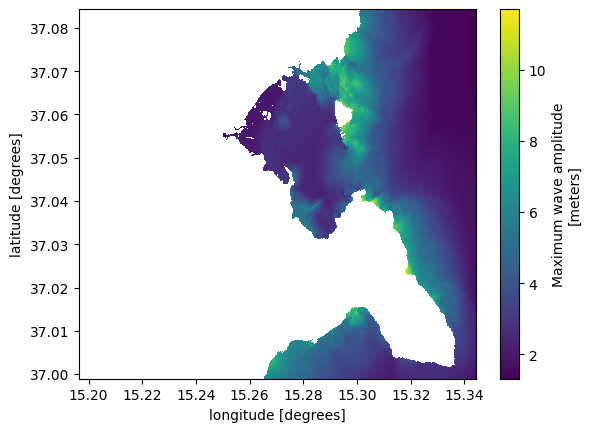

In [6]:
ds1 = xr.open_dataset(file_list[0]) #gridts file
print(ds1)
ds2 = xr.open_dataset(file_list[2]) #gridts file
print(ds2)

ax= (ds1['max_height']).plot()



# fg_gridvar = folium.FeatureGroup(name='Grid var').add_to(m)
# folium.plugins.HeatMap(data=list(zip( ds.lat.values,ds.lon.values,ds.deformed_bathy.values.astype(float))), radius=4,min_opacity=1).add_to(fg_gridnc)


